In [1]:
import os
os.chdir("../src")
import numpy as np
from torch.utils.data import DataLoader
from PIL import Image

from data.transforms import get_transform, get_transform_det
from visualization.visualize import visualize_label, visualize_mask, visualize_coco_annotations_pil


# Chest X-Ray

## JSRT

In [2]:
root_path = os.getenv("JSRT_ROOT_PATH", "../datasets/jsrt")
json_path = os.path.join(root_path, "jsrt_splits.json")
coco_path = os.path.join(root_path, "jsons/jsrt_test.json")

(1024, 1024, 3) (5, 1024, 1024)
torch.Size([2, 1024, 1024, 3]) torch.Size([2, 5, 1024, 1024])


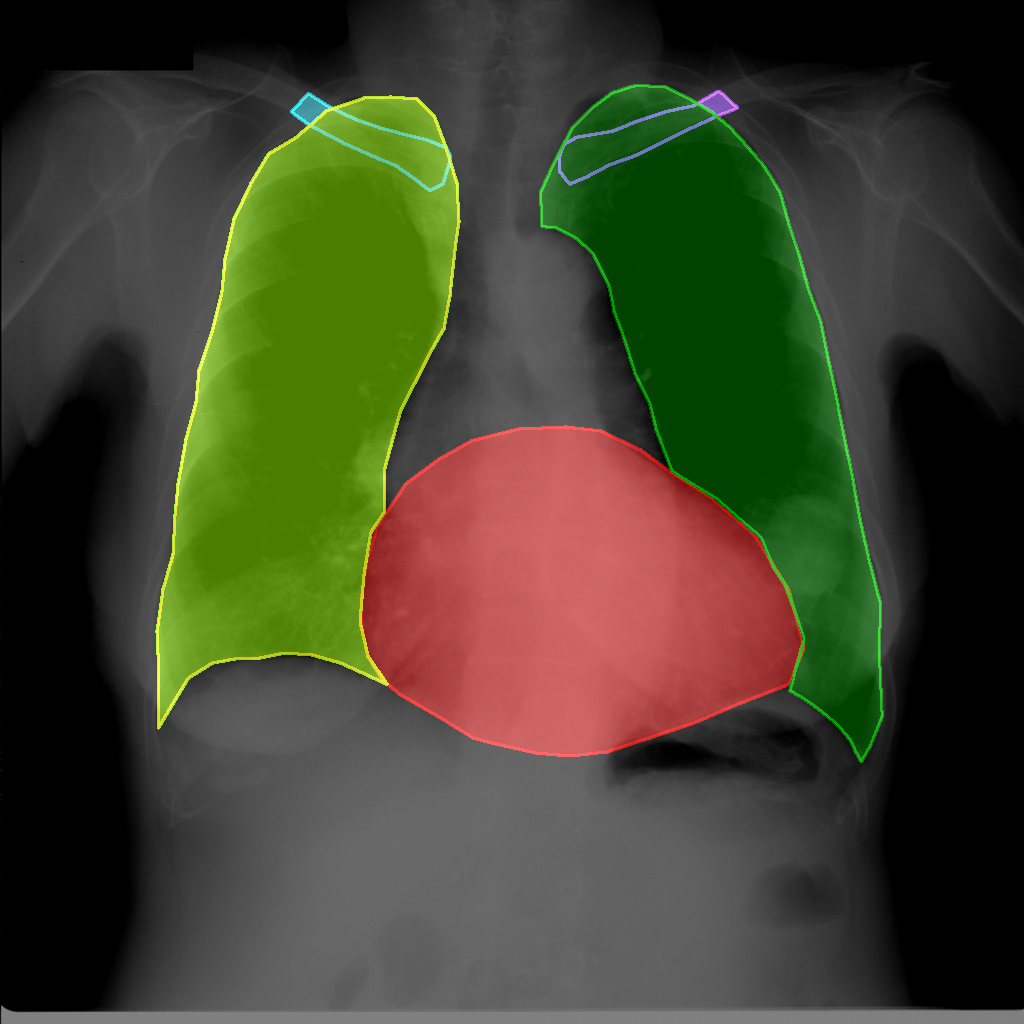

In [3]:
# JSRT
from data import JSRT_binary_Dataset

transform = get_transform("train")
dataset = JSRT_binary_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    # transform=transform
    # transform commented out for visualization purposes 
)

image, mask = dataset[1]

print(image.shape, mask.shape)

dataloader = DataLoader(dataset,batch_size=2, shuffle=True)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(image_batch.shape, mask_batch.shape)

visualize_label(mask, image, [0,1,2,3,4])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
<built-in method size of Tensor object at 0x16db90220> 5
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
2 2


/Users/constantinseibold/workspace/AnatomySegmentation/src/data/base_dataloaders.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'image': torch.tensor(image),


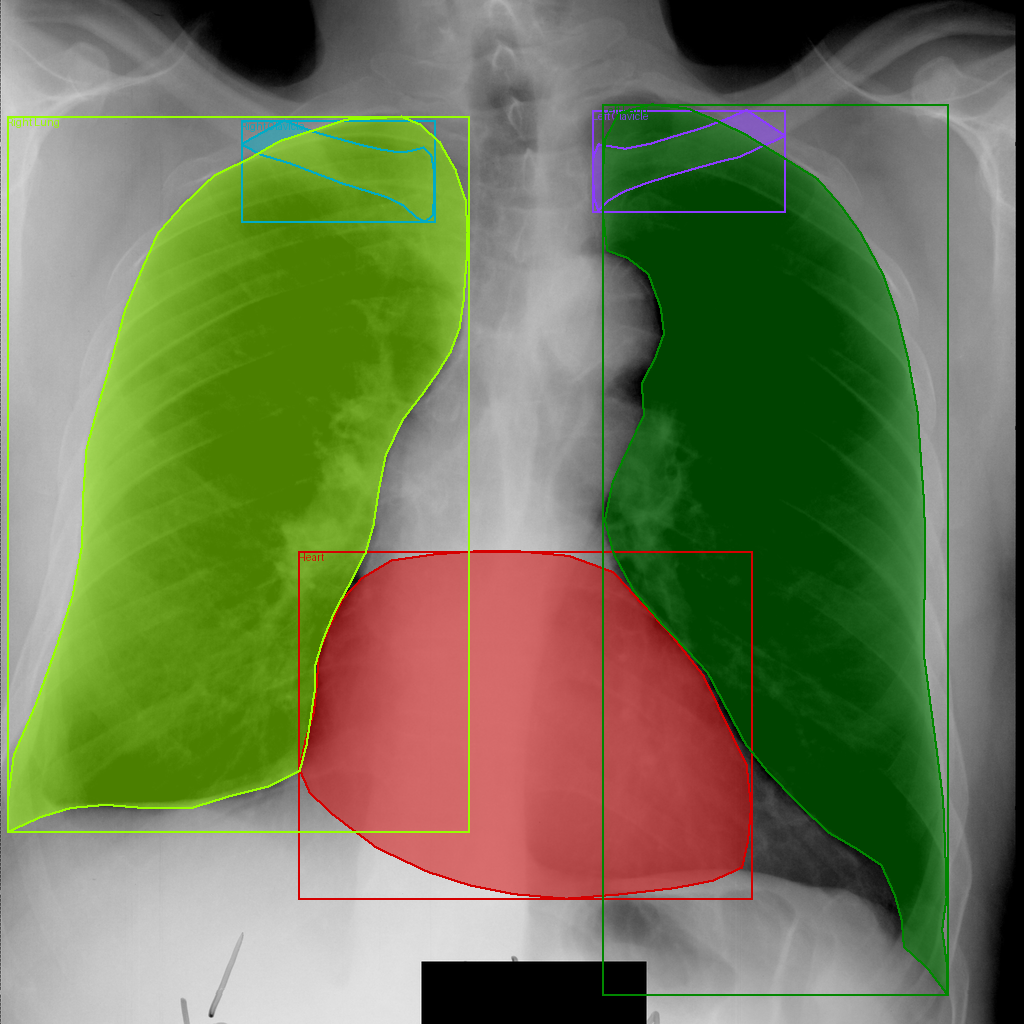

In [8]:
# JSRT
from data import JSRT_detection_Dataset

def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)

transform = get_transform_det()
dataset = JSRT_detection_Dataset(
    root_dir=root_path+"/images/", 
    annFile=coco_path, 
    # transforms = transform,
)

_, target = dataset[1]
image = target["image"]
coco = target["coco"]

print(image.size, len(coco))

dataset = JSRT_detection_Dataset(
    root_dir=root_path+"/images/", 
    annFile=coco_path, 
    transforms = transform,
)
dataloader = DataLoader(dataset,batch_size=2, shuffle=True, collate_fn=collate_fn)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(len(image_batch), len(mask_batch))

visualize_coco_annotations_pil(Image.fromarray(image.numpy()), coco, dataset.coco)

## PAX-Ray

In [2]:
root_path = os.getenv("PAXRAY_ROOT_PATH", "../datasets/paxray")
json_path = os.path.join(root_path, "paxray.json")
coco_path = os.path.join(root_path, "jsons/paxray_test.json")

(512, 512, 3) (4, 512, 512)
torch.Size([2, 512, 512, 3]) torch.Size([2, 4, 512, 512])


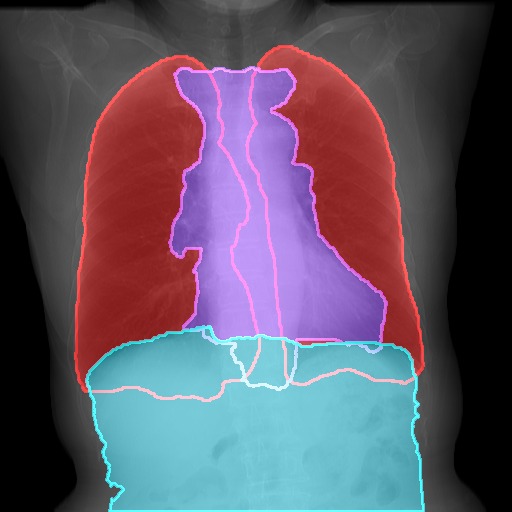

In [10]:
# PAX-Ray4
from data import PAXRay4_binary_Dataset

transform = get_transform("train")
dataset = PAXRay4_binary_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    # transform=transform
    # transform commented out for visualization purposes 
)

image, mask = dataset[1]

print(image.shape, mask.shape)

dataloader = DataLoader(dataset,batch_size=2, shuffle=True)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(image_batch.shape, mask_batch.shape)

visualize_label(mask, image, [0,1,3])

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
torch.Size([512, 512, 3]) 154
2 2


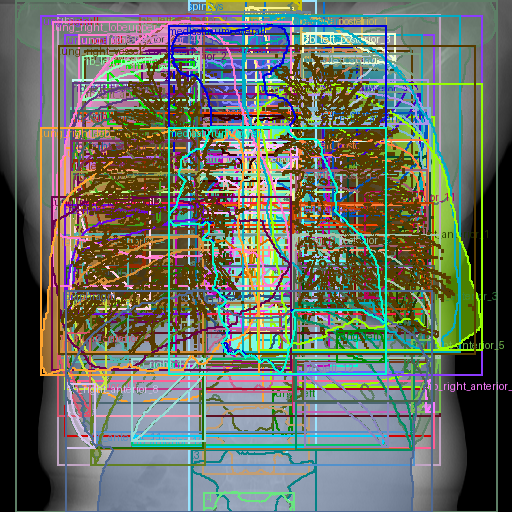

In [4]:
from data import PAXRay166_detection_Dataset, PAXRay4_detection_Dataset

def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)

dataset = PAXRay166_detection_Dataset(
    root_dir=root_path+"/images/", 
    annFile=coco_path, 
)

_, target = dataset[2]
image = target["image"]
coco = target["coco"]
masks = target["masks"]

print(image.size(), len(coco))

dataloader = DataLoader(dataset,batch_size=2, shuffle=True, collate_fn=collate_fn)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(len(image_batch), len(mask_batch))

visualize_coco_annotations_pil(Image.fromarray(image.numpy()), coco, dataset.coco)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


/Users/constantinseibold/workspace/AnatomySegmentation/src/data/base_dataloaders.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'image': torch.tensor(image),


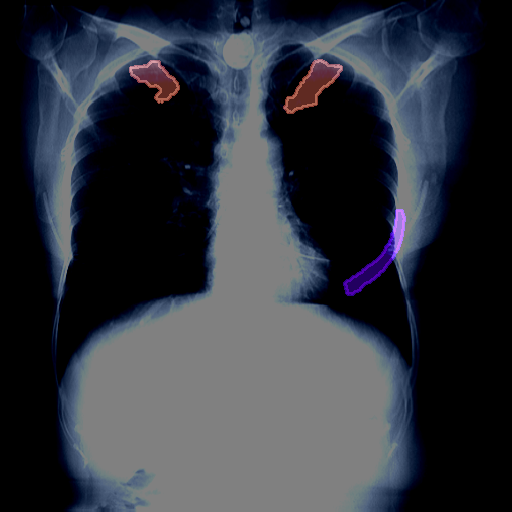

In [5]:
transform = get_transform_det()
dataset = PAXRay166_detection_Dataset(
    root_dir=root_path+"/images/", 
    annFile=coco_path, 
    transforms = transform,
)

_, target = dataset[2]
image = target["image"]
coco = target["coco"]
masks = target["masks"]

visualize_label(masks.numpy(), (image*255).clamp(0,255).permute(1,2,0).numpy().astype(np.uint8), [123, 55, 150])

(512, 512, 3) (166, 512, 512)
torch.Size([2, 512, 512, 3]) torch.Size([2, 166, 512, 512])


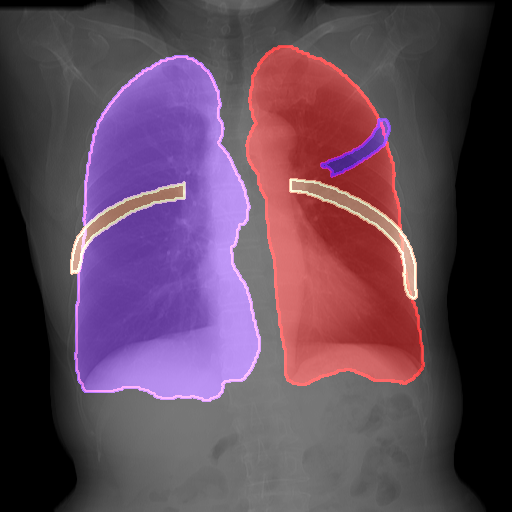

In [17]:
# PAX-Ray
from data import PAXRay166_binary_Dataset,PAXRay166_detection_Dataset


transform = get_transform("train")
dataset = PAXRay166_binary_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    # transform=transform
)

image, mask = dataset[1]

print(image.shape, mask.shape)

dataloader = DataLoader(dataset,batch_size=2, shuffle=True)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(image_batch.shape, mask_batch.shape)

visualize_label(mask, image, [0,1,80, 123])

## PAX-Ray++

: 

: 

: 

: 

: 

: 

# OCT

## DUKE

In [ ]:
root_path = os.getenv("DUKE_ROOT_PATH", "../")
json_path = os.path.join(root_path, "datasets/duke/duke_splits.json")


: 

: 

: 

: 

: 

: 

(496, 542, 3) (496, 542)
torch.Size([1, 496, 524, 3]) torch.Size([1, 496, 524])


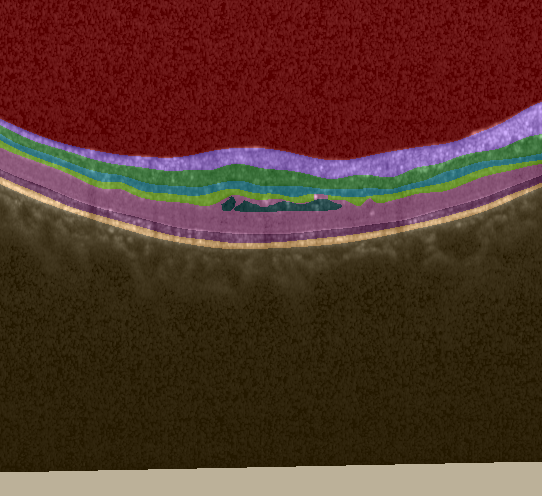

: 

: 

: 

: 

: 

: 

In [ ]:
# JSRT
from data import DUKE_Dataset
from visualization.visualize import visualize_multiclass

transform = get_transform("train")
dataset = DUKE_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    # transform=transform
    # transform commented out for visualization purposes 
)

image, mask = dataset[1]

print(image.shape, mask.shape)

dataloader = DataLoader(dataset,batch_size=1, shuffle=True)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(image_batch.shape, mask_batch.shape)

visualize_multiclass(image, mask, dataset.label_dict)

# Retinal

## RAVIR

In [ ]:
root_path = os.getenv("RAVIR_ROOT_FOLDER", "../datasets/ravir")
json_path = os.path.join(root_path, "ravir_splits.json")


: 

: 

: 

: 

: 

: 

(768, 768, 3) (768, 768)
torch.Size([1, 3, 512, 512]) torch.Size([1, 512, 512])


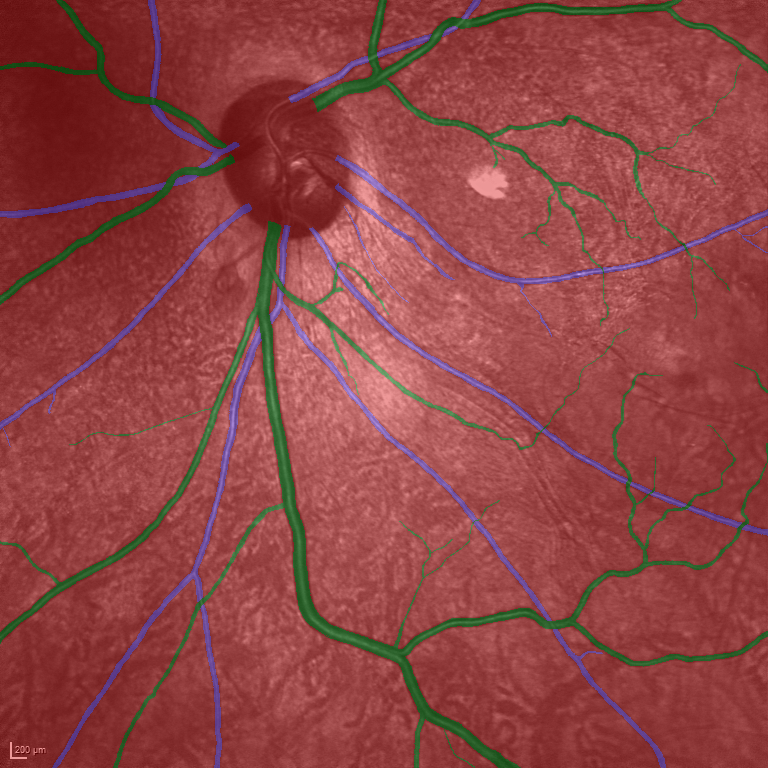

: 

: 

: 

: 

: 

: 

In [ ]:
# RAVIR
from data import RAVIR_Dataset
from visualization.visualize import visualize_multiclass

transform = get_transform("train")
dataset = RAVIR_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    # transform=transform
    # transform commented out for visualization purposes 
)

image, mask = dataset[1]

print(image.shape, mask.shape)

dataset = RAVIR_Dataset(
    root_dir=root_path, 
    splits_json=json_path, 
    split="train",
    transform=transform
    # transform commented out for visualization purposes 
)

dataloader = DataLoader(dataset,batch_size=1, shuffle=True)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(image_batch.shape, mask_batch.shape)

visualize_multiclass(image, mask, dataset.label_dict)

# Scintygraphy

In [ ]:
root_path = os.getenv("BS80K_ROOT", "../datasets/bs80k")
coco_path = os.path.join(root_path, "labels_val.json")

: 

: 

: 

: 

: 

: 

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
(256, 1024) 768
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
2 2


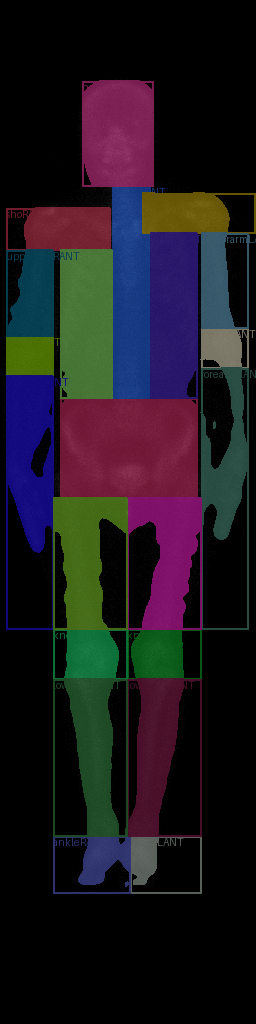

: 

: 

: 

: 

: 

: 

In [ ]:
# JSRT
from data import BS80KAnatomy_detection_Dataset

def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)

transform = get_transform_det()
dataset = BS80KAnatomy_detection_Dataset(
    root_dir=root_path+"/bs80k_wholebody/", 
    annFile=coco_path, 
    # transforms = transform,
)

image, target = dataset[10]
coco = target["coco"]

print(image.size, len(mask))

dataset = BS80KAnatomy_detection_Dataset(
    root_dir=root_path+"/bs80k_wholebody/", 
    annFile=coco_path, 
    transforms = transform,
)
dataloader = DataLoader(dataset,batch_size=2, shuffle=True, collate_fn=collate_fn)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(len(image_batch), len(mask_batch))

visualize_coco_annotations_pil(image.convert("RGB"), coco, dataset.coco)

# Teeth

In [ ]:
root_path = os.getenv("TEETH_ROOT", "../datasets/teeth")
coco_path = os.path.join(root_path, "test.json")

: 

: 

: 

: 

: 

: 

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
(2043, 1024) 768
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
2 2


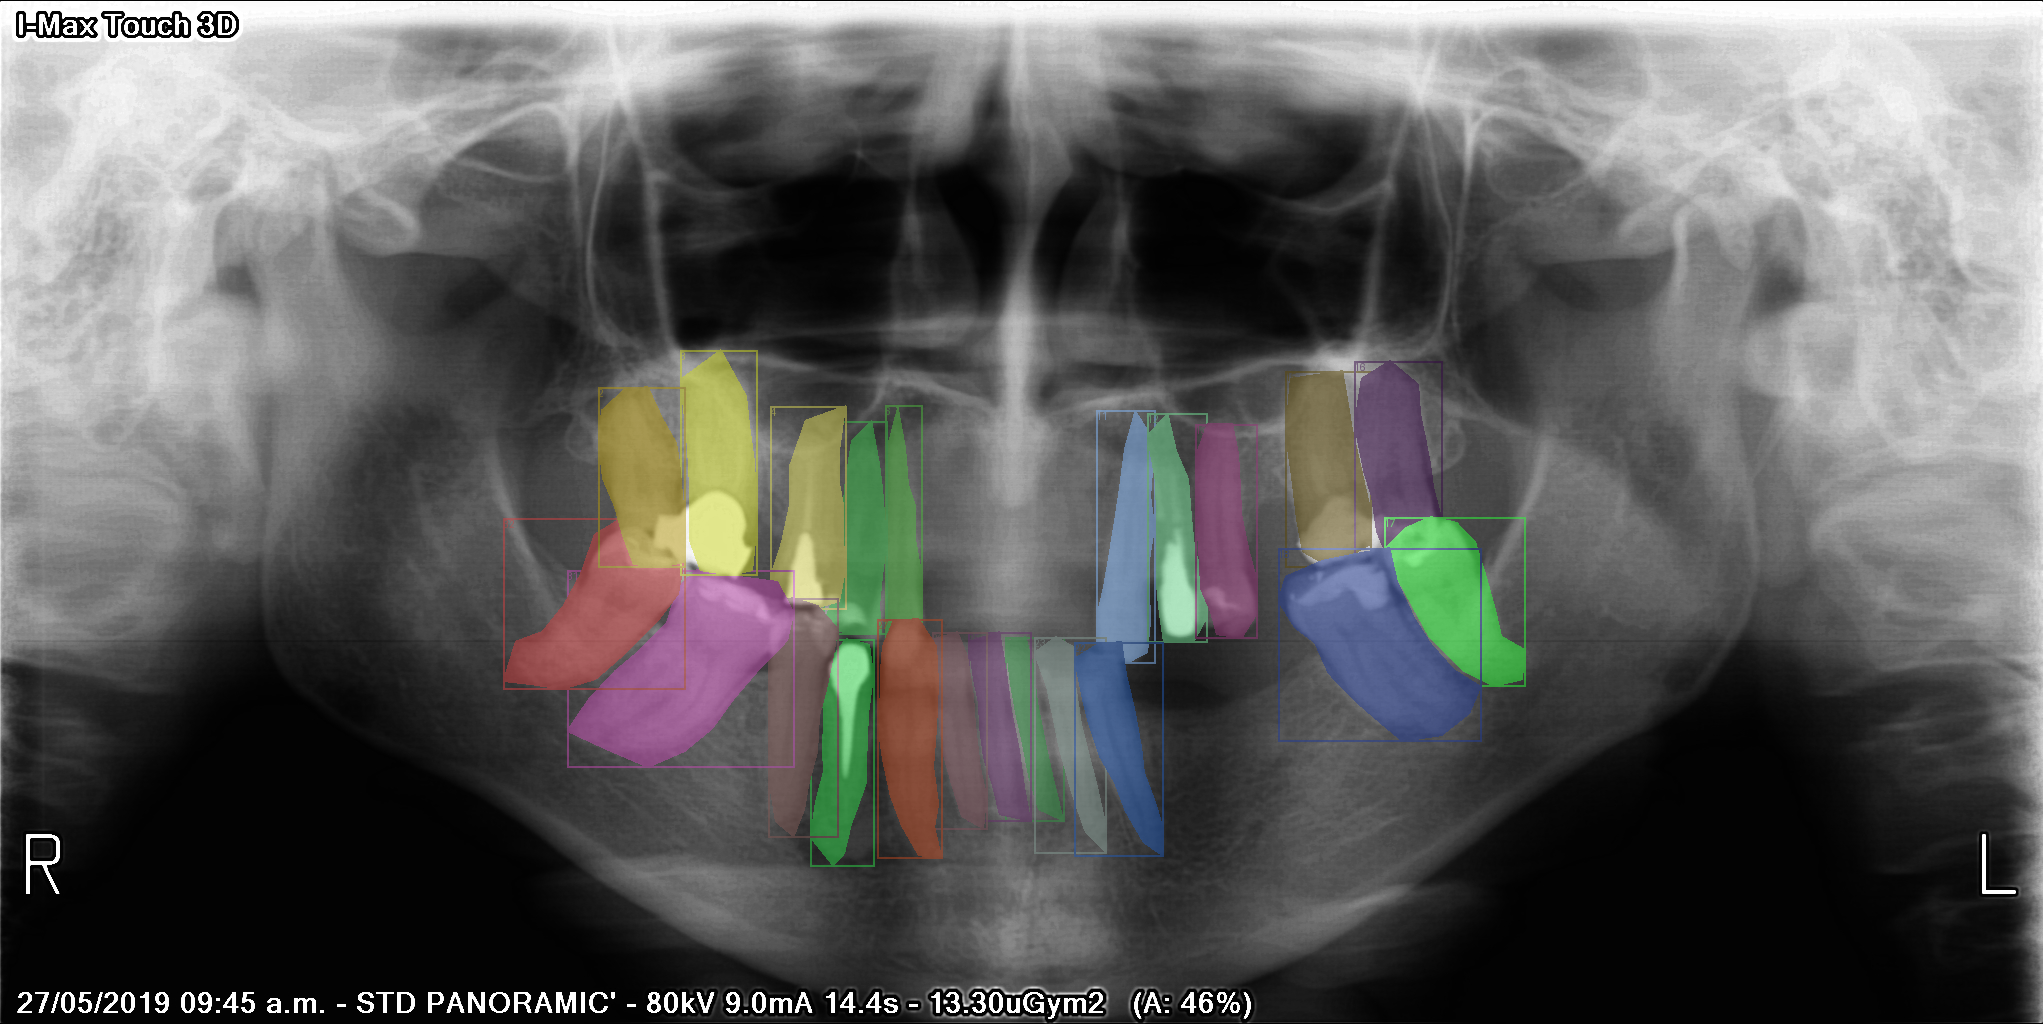

: 

: 

: 

: 

: 

: 

In [ ]:
# JSRT
from data import Teeth_Dataset

def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)

transform = get_transform_det()
dataset = Teeth_Dataset(
    root_dir=root_path+"/img/", 
    annFile=coco_path, 
    # transforms = transform,
)

image, target = dataset[1]
coco = target["coco"]

print(image.size, len(mask))


dataset = Teeth_Dataset(
    root_dir=root_path+"/img/", 
    annFile=coco_path, 
    transforms = transform,
)
dataloader = DataLoader(dataset,batch_size=2, shuffle=True, collate_fn=collate_fn)

i, (image_batch,mask_batch) = next(enumerate(dataloader))

print(len(image_batch), len(mask_batch))

visualize_coco_annotations_pil(image.convert("RGB"), coco, dataset.coco)